# 1. Load the patient data from “patients.csv” file.



In [1]:
import pandas as pd
df_load = pd.read_csv("Patients.csv") # load csv file 
df_load. head(3) 
# as we can see there 2 variables Last Name and Diastolic which need to be removed

,Age,Diastolic,Gender,Height,LastName,Location,SelfAssessedHealthStatus,Smoker,Systolic,Weight
0,38,93,'Male',71,'Smith','County General Hospital','Excellent',1,124,176
1,43,77,'Male',69,'Johnson','VA Hospital','Fair',0,109,163
2,38,83,'Female',64,'Williams','St. Mary's Medical Center','Good',0,125,131


# 2. Use variables Age, Gender, Height, Weight, Smoker, Location, SelfAssessedHealthStatus to build a linear regression model to predict the systolic blood pressure.


In [2]:
#droping the variable Diastolic and Last name
df_drop =  df_load.drop(df_load.columns[[1, 4]], axis=1)
cols = list(df_drop)
cols.insert(6, cols.pop(cols.index('Weight')))
cols.insert(3,cols.pop(cols.index('Weight')))
df1_drop = df_drop.loc[:, cols]
df_patient= pd.DataFrame(df1_drop )
df_patient

,Age,Gender,Height,Weight,Location,SelfAssessedHealthStatus,Smoker,Systolic
0,38,'Male',71,176,'County General Hospital','Excellent',1,124
1,43,'Male',69,163,'VA Hospital','Fair',0,109
2,38,'Female',64,131,'St. Mary's Medical Center','Good',0,125
3,40,'Female',67,133,'VA Hospital','Fair',0,117
4,49,'Female',64,119,'County General Hospital','Good',0,122
...,...,...,...,...,...,...,...,...
95,25,'Male',69,171,'County General Hospital','Good',1,128
96,44,'Male',69,188,'VA Hospital','Good',1,124
97,49,'Male',70,186,'County General Hospital','Fair',0,119
98,45,'Male',68,172,'County General Hospital','Good',1,136


 # 3. What are the regression coefficients (thetas)?


In [3]:
# converting categorical variable using one hot encoding
df_patient_dummies = pd.concat([df_patient[['Age','Height','Weight','Smoker','Systolic']],pd.get_dummies(df_patient.Gender,drop_first = True, prefix = 'Gender_'),pd.get_dummies(df_patient.Location,drop_first = True, prefix = 'Location_'),pd.get_dummies(df_patient.SelfAssessedHealthStatus,drop_first = True, prefix = 'HealthStatus_')],axis =1)
df_patient_dummies
cols = list(df_patient_dummies)
# move the column to head of list using index, pop and insert
cols.insert(10, cols.pop(cols.index('Systolic')))
cols
df_patient_new =df_patient_dummies.loc[:, cols]
df_patient_new

,Age,Height,Weight,Smoker,Gender__'Male',Location__'St. Mary's Medical Center',Location__'VA Hospital',HealthStatus__'Fair',HealthStatus__'Good',HealthStatus__'Poor',Systolic
0,38,71,176,1,1,0,0,0,0,0,124
1,43,69,163,0,1,0,1,1,0,0,109
2,38,64,131,0,0,1,0,0,1,0,125
3,40,67,133,0,0,0,1,1,0,0,117
4,49,64,119,0,0,0,0,0,1,0,122
...,...,...,...,...,...,...,...,...,...,...,...
95,25,69,171,1,1,0,0,0,1,0,128
96,44,69,188,1,1,0,1,0,1,0,124
97,49,70,186,0,1,0,0,1,0,0,119
98,45,68,172,1,1,0,0,0,1,0,136


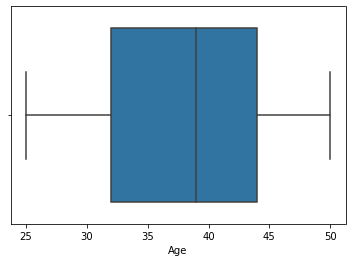

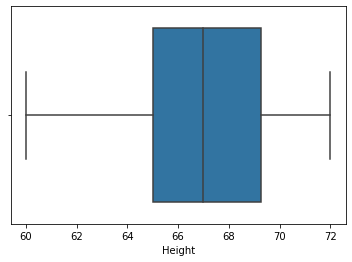

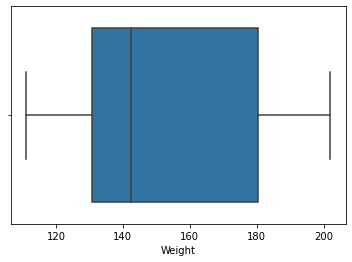

,Age,Height,Weight,Smoker,Gender__'Male',Location__'St. Mary's Medical Center',Location__'VA Hospital',HealthStatus__'Fair',HealthStatus__'Good',HealthStatus__'Poor',Systolic
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.00000
mean,38.280000,67.070000,154.000000,0.340000,0.470000,0.240000,0.370000,0.15000,0.400000,0.110000,122.78000
std,7.215416,2.836469,26.571421,0.476095,0.501614,0.429235,0.485237,0.35887,0.492366,0.314466,6.71284
min,25.000000,60.000000,111.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,109.00000
25%,32.000000,65.000000,130.750000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,117.75000
50%,39.000000,67.000000,142.500000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,122.00000
75%,44.000000,69.250000,180.250000,1.000000,1.000000,0.000000,1.000000,0.00000,1.000000,0.000000,127.25000
max,50.000000,72.000000,202.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,138.00000


In [4]:
# determining the outliers in the numerical data (Height, weight,Age )
sorted(df_patient_new)
Q1=df_patient_new.quantile(0.25)
Q3=df_patient_new.quantile(0.75)
IQR=Q3-Q1
#print(IQR)
#print(df_patient < (Q1 - 1.5 * IQR)) |(df_patient> (Q3 + 1.5 * IQR))
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
#sns.boxplot(data=df_patient_new["Location__'St. Mary's Medical Center'"])

sns.boxplot(x = df_patient_new['Age'])
plt.show()
sns.boxplot(x= df_patient_new['Height'])
plt.show()
sns.boxplot(x= df_patient_new['Weight'])

plt.show()
df_patient_new.describe()
# df_patient < (Q1 - 1.5 * IQR))  also (df_patient> (Q3 + 1.5 * IQR)) so, no outlier found

In [63]:
#scaling †he features:
X= df_patient_new.iloc[:,:-1].values
y = df_patient_new.iloc[:,-1].values
model_features = ['Age', 'Height', 'Weight', 'Smoker', "Gender__'Male'","Location__'St. Mary's Medical Center'",
                   "Location__'VA Hospital'","HealthStatus__'Fair'" , "HealthStatus__'Good'", "HealthStatus__'Poor'"]
from sklearn.preprocessing import scale

df_X = pd.DataFrame(X, columns = model_features )
df_numeric =  df_X.drop(df_X.columns[[3, 4,5,6,7,8,9]], axis=1)
df_categorical = df_X.drop(df_X.columns[[0,1,2]], axis=1)
numeric_scale= scale(df_numeric)
print(numeric_scale.mean(axis=0))
print(numeric_scale.std(axis=0))
df_numeric_scale = pd.DataFrame(numeric_scale, columns = ['Age', 'Height', 'Weight'])
X_scale = pd.concat([df_numeric_scale ,df_categorical], axis =1)
#Splitting the data into Training Set and Test Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scale,y,test_size=0.3)
# Fitting logistic regression on our standardized data set

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)

#determining the intercept and theta values, RMSE and R2

from sklearn.metrics import mean_squared_error,r2_score
print('Intercept: \n',  model.intercept_ )

coef_dict = dict(zip(model_features, model.coef_))
df = pd.DataFrame(list(coef_dict.items()),columns = ['Feature','Coef'])
print('Coefficients: \n',  df )
# The mean squared error
print('RMSE: %.2f'  %mean_squared_error(y_test, yhat,squared = False))
#  variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, yhat))
# The mean squared error
print('MSE: %.2f'  %mean_squared_error(y_test, yhat))

[-1.57651669e-16  2.45692355e-15 -1.22124533e-17]
[1. 1. 1.]
Intercept: 
 121.71734769548412
Coefficients: 
                                  Feature      Coef
0                                    Age  1.232660
1                                 Height  1.549090
2                                 Weight -0.475070
3                                 Smoker  9.720256
4                         Gender__'Male' -1.911441
5  Location__'St. Mary's Medical Center' -0.371686
6                Location__'VA Hospital' -2.801331
7                   HealthStatus__'Fair' -2.258834
8                   HealthStatus__'Good'  0.086496
9                   HealthStatus__'Poor'  1.241223
RMSE: 5.13
Variance score: 0.52
MSE: 26.34


 # 4. How do you interpret those numbers?



In this dataset the systolic blood pressure range start from 121.71734769548412

1. when the Age increases by 1 standard devation,  the systolic blood pressure also increases by 1.232660
2.when weight increases by 1 Standard devation,  the systolic blood pressure decreases by 0.475070
3.Increase in the Height by 1 standard devation, result in increase in blood pressure by   1.549090
4.smoker systolic blood pressure is 9.720256 higher with respect to systolic blood pressure of  non smoker.
5.male compared to reference group female, blood pressure of male will be  1.911441 lower comapred to the female. 
6.Patient from 'St. Mary's Medical Center' location have 0.371686 lower blood pressure with respect to the patient of 'County General Hospital'
7.Patient from 'VA Hospital' location will have 2.801331 lower blood pressure than the patient of  County General Hospital.
8.Patient with HealthStatus__'Fair' have 2.258834 lower blood pressure with respect to the patient with  excellent health.
9. Patient who say  HealthStatus__'Good'  have 0.086496 higher blood pressure with respect to the patient with excellent health.
10. Patient with HealthStatus__'Poor'  have  1.241223 higher blood pressure with respect to patient with excellent health. 

 # 5. If you need to identify one outlier record, which record is a potential outlier? How do you reach this conclusion?

There are no outliers for categorical (dummy)/binary attributes Gender,  LastName, Location, SelfAssessment and Smoker are all irrelevant in the search for outliers. Hence,  only interested attributes are numeric attributes: Age, Height and Weight.
We use box plot to search the outliers.
    


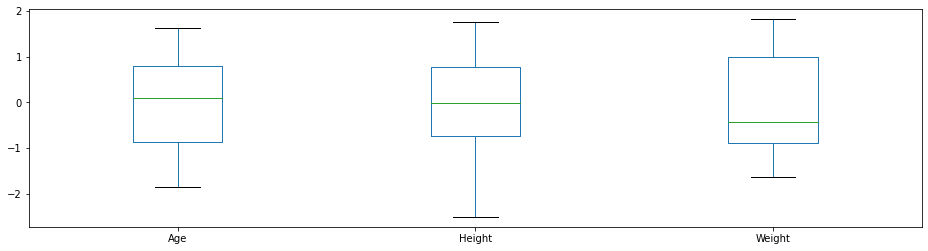

In [64]:
#spotting outlier using box plot
X_scale=scale(X)

df_dscale = pd.DataFrame(X_scale, columns = model_features)
df_numeric_scale =  df_dscale.drop(df_dscale.columns[[3, 4,5,6,7,8,9]], axis=1)
df_numeric_scale
import matplotlib.pyplot as plot

#get_ipython().run_line_magic(‘matplotlib’, ‘inline’)

df_numeric_scale.plot.box(figsize=(16,4))

patientsY = pd.DataFrame(y, columns = ['Systolic'])

#sorted(df_numeric_scale)

#Q1=df_numeric_scale.quantile(0.25)
#Q3=df_numeric_scale.quantile(0.75)
#IQR=Q3-Q1


This suggests Height has the largest absolute outlier, 
which is a minimum. We 
can now examine this with scatterplots.

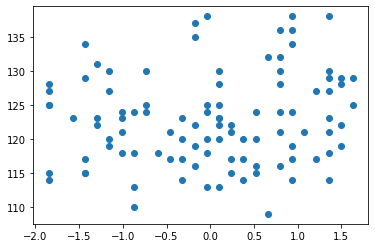

In [65]:
plt.scatter(df_numeric_scale['Age'], patientsY)

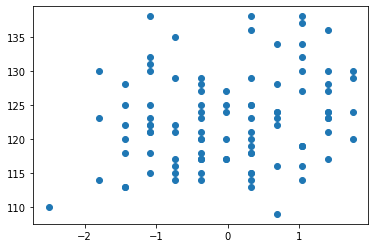

In [66]:
plt.scatter(df_numeric_scale['Height'], patientsY)

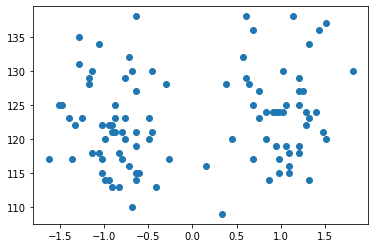

In [67]:
plt.scatter(df_numeric_scale['Weight'], patientsY)

In [68]:
print("Min :", df_numeric_scale.min())
print("Max :" , df_numeric_scale.max())

Min : Age      -1.849776
Height   -2.505093
Weight   -1.626433
dtype: float64
Max : Age       1.632483
Height    1.746833
Weight    1.815553
dtype: float64


The single outlier record I identify using a boxplot is the lowest Height value, -2.505